# Dendrograms + PCA for ClimateWins

# 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Create a path

path = r'/Users/roxanamiu/Documents/Climate Change project 2'

In [3]:
# Set display options to show all columns

pd.set_option('display.max_columns', None)

In [4]:
# Import unscaled dataset

unscaled = pd.read_csv(os.path.join(path, 'Data/Climate.csv'))
unscaled

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,GDANSK_cloud_cover,GDANSK_humidity,GDANSK_precipitation,GDANSK_snow_depth,GDANSK_temp_mean,GDANSK_temp_min,GDANSK_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,ROMA_cloud_cover,ROMA_wind_speed,ROMA_humidity,ROMA_pressure,ROMA_sunshine,ROMA_temp_mean,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.0180,0.32,0.09,0,0.7,6.5,0.8,10.9,1,0.81,1.0195,0.88,0.00,7.0,3.7,-0.9,7.9,4,0.67,1.017,0.44,0.01,2.3,2.4,-0.4,5.1,7,7.7,0.85,1.0032,0.07,0.25,0.0,9.3,7.4,11.0,8,5.4,0.83,1.0161,0.12,0.08,0,0.0,10.0,7.0,11.5,8,0.91,0.00,0,0.8,-0.3,1.6,7,0.91,1.0010,0.13,0.22,0,0.0,10.6,9.4,8.3,2.9,0.82,1.0094,0.28,0.48,1.6,7.9,3.9,9.4,8,1.4,1.00,1.0173,0.20,0.00,0.0,-0.6,-1.9,0.5,7,8.7,0.83,1.0063,0.22,0.32,1.0,9.5,8.5,11.1,6,0.0,0.92,1.0260,0.53,0.00,1.4,7.6,4.4,10.8,5,0.67,0.20,0.10,0,0.0,6.9,1.1,10.4,8,4.0,0.98,0.9978,0.04,1.14,0,0.0,4.9,3.8,5.9,3,2.6,0.73,1.0152,7.1,7.8,4,4.5,0.73,1.0304,0.48,0.01,2.3,-5.9,-8.5,-3.2,5,1.0114,0.05,0.32,0.0,4.2,2.2,4.9,3.8,0.76,1.0169,1.54,0.44,10.0,7.8,12.2,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.

In [5]:
# Import the answers dataset (0 = unpleasant day, 1 = pleasant day)

answers = pd.read_csv(os.path.join(path, 'Data/Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))
answers

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The answers don’t include three of the weather stations (Gdansk, Rome and Tours), as there isn’t enough pertinent data to create a supervised answer set. In the next step, we will need to  drop columns in the unscaled dataset pertaining to these stations.

# Data Wrangling and Scaling

In [6]:
# Drop the columns related to Tours, Gdansk and Rome from the unscaled dataset

weather = unscaled.drop(['GDANSK_cloud_cover', 'GDANSK_humidity', 'GDANSK_precipitation', 'GDANSK_snow_depth', 'GDANSK_temp_mean', 'GDANSK_temp_min', 'GDANSK_temp_max',
                        'ROMA_cloud_cover', 'ROMA_wind_speed', 'ROMA_humidity', 'ROMA_pressure', 'ROMA_sunshine', 'ROMA_temp_mean',
                        'TOURS_wind_speed', 'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation', 'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min', 'TOURS_temp_max'], axis=1)

In [7]:
# Reduce the dataset to a single decade (2010s)

dfdecade = weather[(weather['DATE'].astype(str).str[:4] >= '2010') & (weather['DATE'].astype(str).str[:4] <= '2019')]
dfdecade

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,2.3,0.93,0.9965,0.18,0.56,0,0.0,2.9,-0.2,4.8,6,0.85,0.9912,0.64,2.63,3.2,9.9,8.4,13.4,6,0.67,1.017,0.31,0.00,0.7,5.0,3.6,7.8,4,3.8,0.78,1.0026,0.37,0.00,4.2,-1.6,-6.3,0.7,8,3.9,0.89,0.9997,0.12,0.02,0,0.0,-1.1,-2.8,-0.6,2,0.77,1.0056,0.49,0.00,0,6.4,1.6,-0.5,5.0,3.1,0.93,0.9981,0.12,0.20,0.0,-2.6,-3.0,-1.8,8,1.0,0.97,0.9926,0.12,0.46,0.0,6.9,5.5,7.7,7,4.6,0.91,1.0008,0.12,0.01,0.0,-2.0,-6.1,-1.1,5,4.4,0.82,1.0107,0.46,0.01,2.8,5.6,3.6,7.6,7,0.91,0.20,0.43,0,0.0,3.1,0.1,4.9,7,6.0,0.76,1.0110,0.04,0.24,33,0.0,-7.7,-8.9,-4.9,4,7.5,0.89,1.0054,0.66,0.56,5.6,-9.7,-11.5,-7.9,6,1.0068,0.12,0.07,1.5,-7.6,-8.8,-7.0,1,0.80,1.0121,0.43,0.00,0,6.0,1.7,-1.6,5.0
18264,20100102,1,3,3.0,0.74,1.0193,0.58,0.00,1,5.2,-1.5,-4.2,0.4,8,0.92,0.9995,0.25,0.74,0.0,3.5,0.7,8.4,7,0.67,1.017,0.38,0.01,1.4,1.6,0.1,5.8,8,3.1,0.91,1.0140,0.14,0.01,0.0,-1.1,-6.4,1.2,7,3.6,0.88,1.0152,0.26,0.45,1,1.6,-1.5,-5.8,0.6,4,0.82,1.0155,0.48,0.00,0,5.9,1.3,-2.4,3.0,2.6,0.87,1.0146,0.31,0.10,2.0,-3.7,-4.8,-2.5,8,1.3,0.94,1.0066,0.20,0.79,0.0,2.5,0.7,6.7,7,4.9,0.90,1.0161,0.30,0.02,2.7,-2.1,-6.7,0.2,7,1.1,0.81,1.0205,0.42,0.00,0.3,5

In [8]:
# Create scaler object

scaler = StandardScaler()

In [9]:
# Scale dfdecade

scaled_decade = pd.DataFrame(scaler.fit_transform(dfdecade), columns = list(dfdecade))
scaled_decade

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.586441,-1.601710,1.132837,0.505656,1.622829,-2.644573,-1.386157,0.672591,-0.185608,-1.089903,-1.128475,-1.102088,-1.263213,0.793622,1.301794,-3.439546,-1.171140,4.653648,-0.747593,-0.453788,-0.182702,-0.511221,2.246930,0.0,2.220446e-16,-1.961731,-0.314715,-1.787963,-0.906738,-0.698796,-0.999327,-0.783480,0.295116,-0.209427,-1.338700,-0.918870,-0.474490,-0.167200,-1.965574,-2.209539,-1.933669,1.314089,-0.027040,1.168313,-1.805303,-1.168605,-0.436243,-0.130923,-1.043323,-1.805708,-1.536767,-2.005211,-1.201609,0.121738,-0.931338,-0.767017,-0.453027,-0.083534,0.569700,-1.795894,-1.590768,-1.643214,0.956456,2.076278,-3.474642,-1.904815,0.077925,-1.564436,-2.467463,-1.968305,-2.660543,1.271401,-0.414737,1.603361,-3.320243,-1.283804,0.071872,-1.170469,-0.611718,-0.300603,-0.937624,0.584084,0.400369,1.128916,-1.681159,-1.223295,-0.414055,-1.173954,-1.917968,-2.148195,-2.045858,0.602616,2.696234,1.411740,-0.780560,-1.573157,-0.287753,-1.378922,-1.308362,-1.061242,-1.461833,0.674216,1.385644,-1.248996,0.294895,-0.404488,-1.101998,-0.941898,-0.917827,-1.096734,0.639973,2.791853,0.084472,-0.065380,-1.207685,0.00039

We should remove scaled Date and Month columns from the scaled dataset (as they represent dates, not numbers), and then attach the original Date and Month columns to prevent loss of information.

In [10]:
# Create a copy of the DATE and MONTH columns

date_month_columns = dfdecade[['DATE', 'MONTH']]

In [11]:
date_month_columns

,DATE,MONTH
18263,20100101,1
18264,20100102,1
18265,20100103,1
18266,20100104,1
18267,20100105,1
...,...,...
21910,20191227,12
21911,20191228,12
21912,20191229,12
21913,20191230,12


In [12]:
# Reset the index

date_month_columns.reset_index(drop=True, inplace=True)
date_month_columns

,DATE,MONTH
0,20100101,1
1,20100102,1
2,20100103,1
3,20100104,1
4,20100105,1
...,...,...
3647,20191227,12
3648,20191228,12
3649,20191229,12
3650,20191230,12


In [13]:
# Drop unnecessary scaled columns

scaled_decade.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [14]:
scaled_decade

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,1.132837,0.505656,1.622829,-2.644573,-1.386157,0.672591,-0.185608,-1.089903,-1.128475,-1.102088,-1.263213,0.793622,1.301794,-3.439546,-1.171140,4.653648,-0.747593,-0.453788,-0.182702,-0.511221,2.246930,0.0,2.220446e-16,-1.961731,-0.314715,-1.787963,-0.906738,-0.698796,-0.999327,-0.783480,0.295116,-0.209427,-1.338700,-0.918870,-0.474490,-0.167200,-1.965574,-2.209539,-1.933669,1.314089,-0.027040,1.168313,-1.805303,-1.168605,-0.436243,-0.130923,-1.043323,-1.805708,-1.536767,-2.005211,-1.201609,0.121738,-0.931338,-0.767017,-0.453027,-0.083534,0.569700,-1.795894,-1.590768,-1.643214,0.956456,2.076278,-3.474642,-1.904815,0.077925,-1.564436,-2.467463,-1.968305,-2.660543,1.271401,-0.414737,1.603361,-3.320243,-1.283804,0.071872,-1.170469,-0.611718,-0.300603,-0.937624,0.584084,0.400369,1.128916,-1.681159,-1.223295,-0.414055,-1.173954,-1.917968,-2.148195,-2.045858,0.602616,2.696234,1.411740,-0.780560,-1.573157,-0.287753,-1.378922,-1.308362,-1.061242,-1.461833,0.674216,1.385644,-1.248996,0.294895,-0.404488,-1.101998,-0.941898,-0.917827,-1.096734,0.639973,2.791853,0.084472,-0.065380,-1.207685,0.000391,2.290034,-1.134607,-1.817358,

In [15]:
# Concatenate the DATE and MONTH columns back to the scaled dataframe

final_scaled = pd.concat([date_month_columns, scaled_decade], axis=1)
final_scaled

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,20100101,1,1.132837,0.505656,1.622829,-2.644573,-1.386157,0.672591,-0.185608,-1.089903,-1.128475,-1.102088,-1.263213,0.793622,1.301794,-3.439546,-1.171140,4.653648,-0.747593,-0.453788,-0.182702,-0.511221,2.246930,0.0,2.220446e-16,-1.961731,-0.314715,-1.787963,-0.906738,-0.698796,-0.999327,-0.783480,0.295116,-0.209427,-1.338700,-0.918870,-0.474490,-0.167200,-1.965574,-2.209539,-1.933669,1.314089,-0.027040,1.168313,-1.805303,-1.168605,-0.436243,-0.130923,-1.043323,-1.805708,-1.536767,-2.005211,-1.201609,0.121738,-0.931338,-0.767017,-0.453027,-0.083534,0.569700,-1.795894,-1.590768,-1.643214,0.956456,2.076278,-3.474642,-1.904815,0.077925,-1.564436,-2.467463,-1.968305,-2.660543,1.271401,-0.414737,1.603361,-3.320243,-1.283804,0.071872,-1.170469,-0.611718,-0.300603,-0.937624,0.584084,0.400369,1.128916,-1.681159,-1.223295,-0.414055,-1.173954,-1.917968,-2.148195,-2.045858,0.602616,2.696234,1.411740,-0.780560,-1.573157,-0.287753,-1.378922,-1.308362,-1.061242,-1.461833,0.674216,1.385644,-1.248996,0.294895,-0.404488,-1.101998,-0.941898,-0.917827,-1.096734,0.639973,2.791853,0.084472,-0.065380,-1.207685,0.000391,2.29003

# Dendrograms

# Single method

In [16]:
# Select relevant columns to plot

columns_to_plot = [ 
    'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation', 
    'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min', 
    'BASEL_temp_max', 'BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure', 
    'BELGRADE_global_radiation', 'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean', 
    'BELGRADE_temp_min', 'BELGRADE_temp_max', 'BUDAPEST_cloud_cover', 'BUDAPEST_humidity', 'BUDAPEST_pressure', 
    'BUDAPEST_global_radiation', 'BUDAPEST_precipitation', 'BUDAPEST_sunshine', 'BUDAPEST_temp_mean', 
    'BUDAPEST_temp_min', 'BUDAPEST_temp_max', 'DEBILT_cloud_cover', 'DEBILT_wind_speed', 'DEBILT_humidity', 
    'DEBILT_pressure', 'DEBILT_global_radiation', 'DEBILT_precipitation', 'DEBILT_sunshine', 'DEBILT_temp_mean', 
    'DEBILT_temp_min', 'DEBILT_temp_max', 'DUSSELDORF_cloud_cover', 'DUSSELDORF_wind_speed', 'DUSSELDORF_humidity', 
    'DUSSELDORF_pressure', 'DUSSELDORF_global_radiation', 'DUSSELDORF_precipitation', 'DUSSELDORF_snow_depth', 
    'DUSSELDORF_sunshine', 'DUSSELDORF_temp_mean', 'DUSSELDORF_temp_min', 'DUSSELDORF_temp_max', 
    'HEATHROW_cloud_cover', 'HEATHROW_humidity', 'HEATHROW_pressure', 'HEATHROW_global_radiation', 
    'HEATHROW_precipitation', 'HEATHROW_snow_depth', 'HEATHROW_sunshine', 'HEATHROW_temp_mean', 
    'HEATHROW_temp_min', 'HEATHROW_temp_max', 'KASSEL_wind_speed', 'KASSEL_humidity', 'KASSEL_pressure', 
    'KASSEL_global_radiation', 'KASSEL_precipitation', 'KASSEL_sunshine', 'KASSEL_temp_mean', 'KASSEL_temp_min', 
    'KASSEL_temp_max', 'LJUBLJANA_cloud_cover', 'LJUBLJANA_wind_speed', 'LJUBLJANA_humidity', 'LJUBLJANA_pressure', 
    'LJUBLJANA_global_radiation', 'LJUBLJANA_precipitation', 'LJUBLJANA_sunshine', 'LJUBLJANA_temp_mean', 
    'LJUBLJANA_temp_min', 'LJUBLJANA_temp_max', 'MAASTRICHT_cloud_cover', 'MAASTRICHT_wind_speed', 
    'MAASTRICHT_humidity', 'MAASTRICHT_pressure', 'MAASTRICHT_global_radiation', 'MAASTRICHT_precipitation', 
    'MAASTRICHT_sunshine', 'MAASTRICHT_temp_mean', 'MAASTRICHT_temp_min', 'MAASTRICHT_temp_max', 
    'MADRID_cloud_cover', 'MADRID_wind_speed', 'MADRID_humidity', 'MADRID_pressure', 'MADRID_global_radiation', 
    'MADRID_precipitation', 'MADRID_sunshine', 'MADRID_temp_mean', 'MADRID_temp_min', 'MADRID_temp_max', 
    'MUNCHENB_cloud_cover', 'MUNCHENB_humidity', 'MUNCHENB_global_radiation', 'MUNCHENB_precipitation', 
    'MUNCHENB_snow_depth', 'MUNCHENB_sunshine', 'MUNCHENB_temp_mean', 'MUNCHENB_temp_min', 'MUNCHENB_temp_max', 
    'OSLO_cloud_cover', 'OSLO_wind_speed', 'OSLO_humidity', 'OSLO_pressure', 'OSLO_global_radiation', 
    'OSLO_precipitation', 'OSLO_snow_depth', 'OSLO_sunshine', 'OSLO_temp_mean', 'OSLO_temp_min', 'OSLO_temp_max', 
    'SONNBLICK_cloud_cover', 'SONNBLICK_wind_speed', 'SONNBLICK_humidity', 'SONNBLICK_pressure', 
    'SONNBLICK_global_radiation', 'SONNBLICK_precipitation', 'SONNBLICK_sunshine', 'SONNBLICK_temp_mean', 
    'SONNBLICK_temp_min', 'SONNBLICK_temp_max', 'STOCKHOLM_cloud_cover', 'STOCKHOLM_pressure', 
    'STOCKHOLM_global_radiation', 'STOCKHOLM_precipitation', 'STOCKHOLM_sunshine', 'STOCKHOLM_temp_mean', 
    'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure', 
    'VALENTIA_global_radiation', 'VALENTIA_precipitation', 'VALENTIA_snow_depth', 'VALENTIA_sunshine', 
    'VALENTIA_temp_mean', 'VALENTIA_temp_min', 'VALENTIA_temp_max'
]

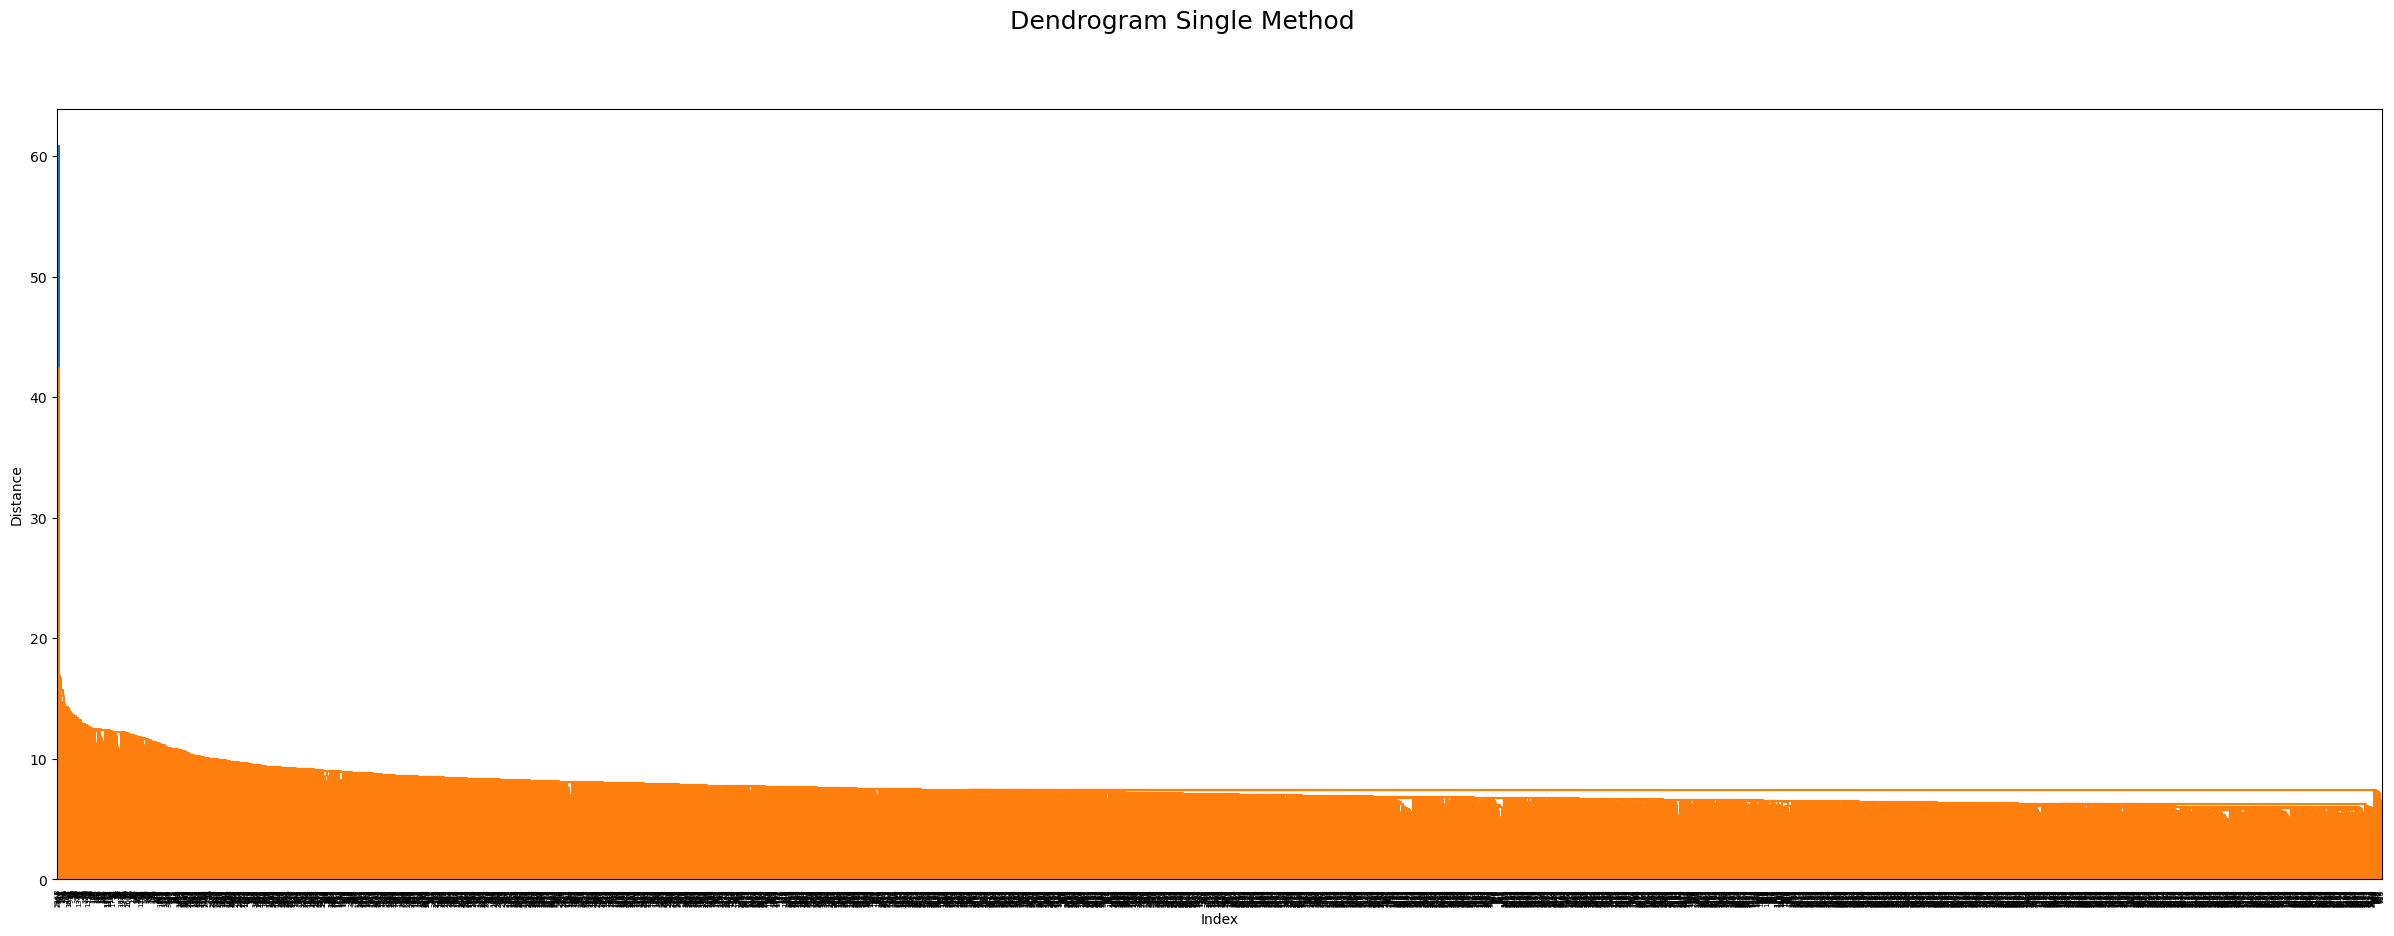

In [17]:
# Use the list to select the columns

distance_single = linkage(final_scaled[columns_to_plot], method="single")

# Plot the dendrogram

plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

It seems there is too much data and the dendrogram is difficult to interpret.

# Average method

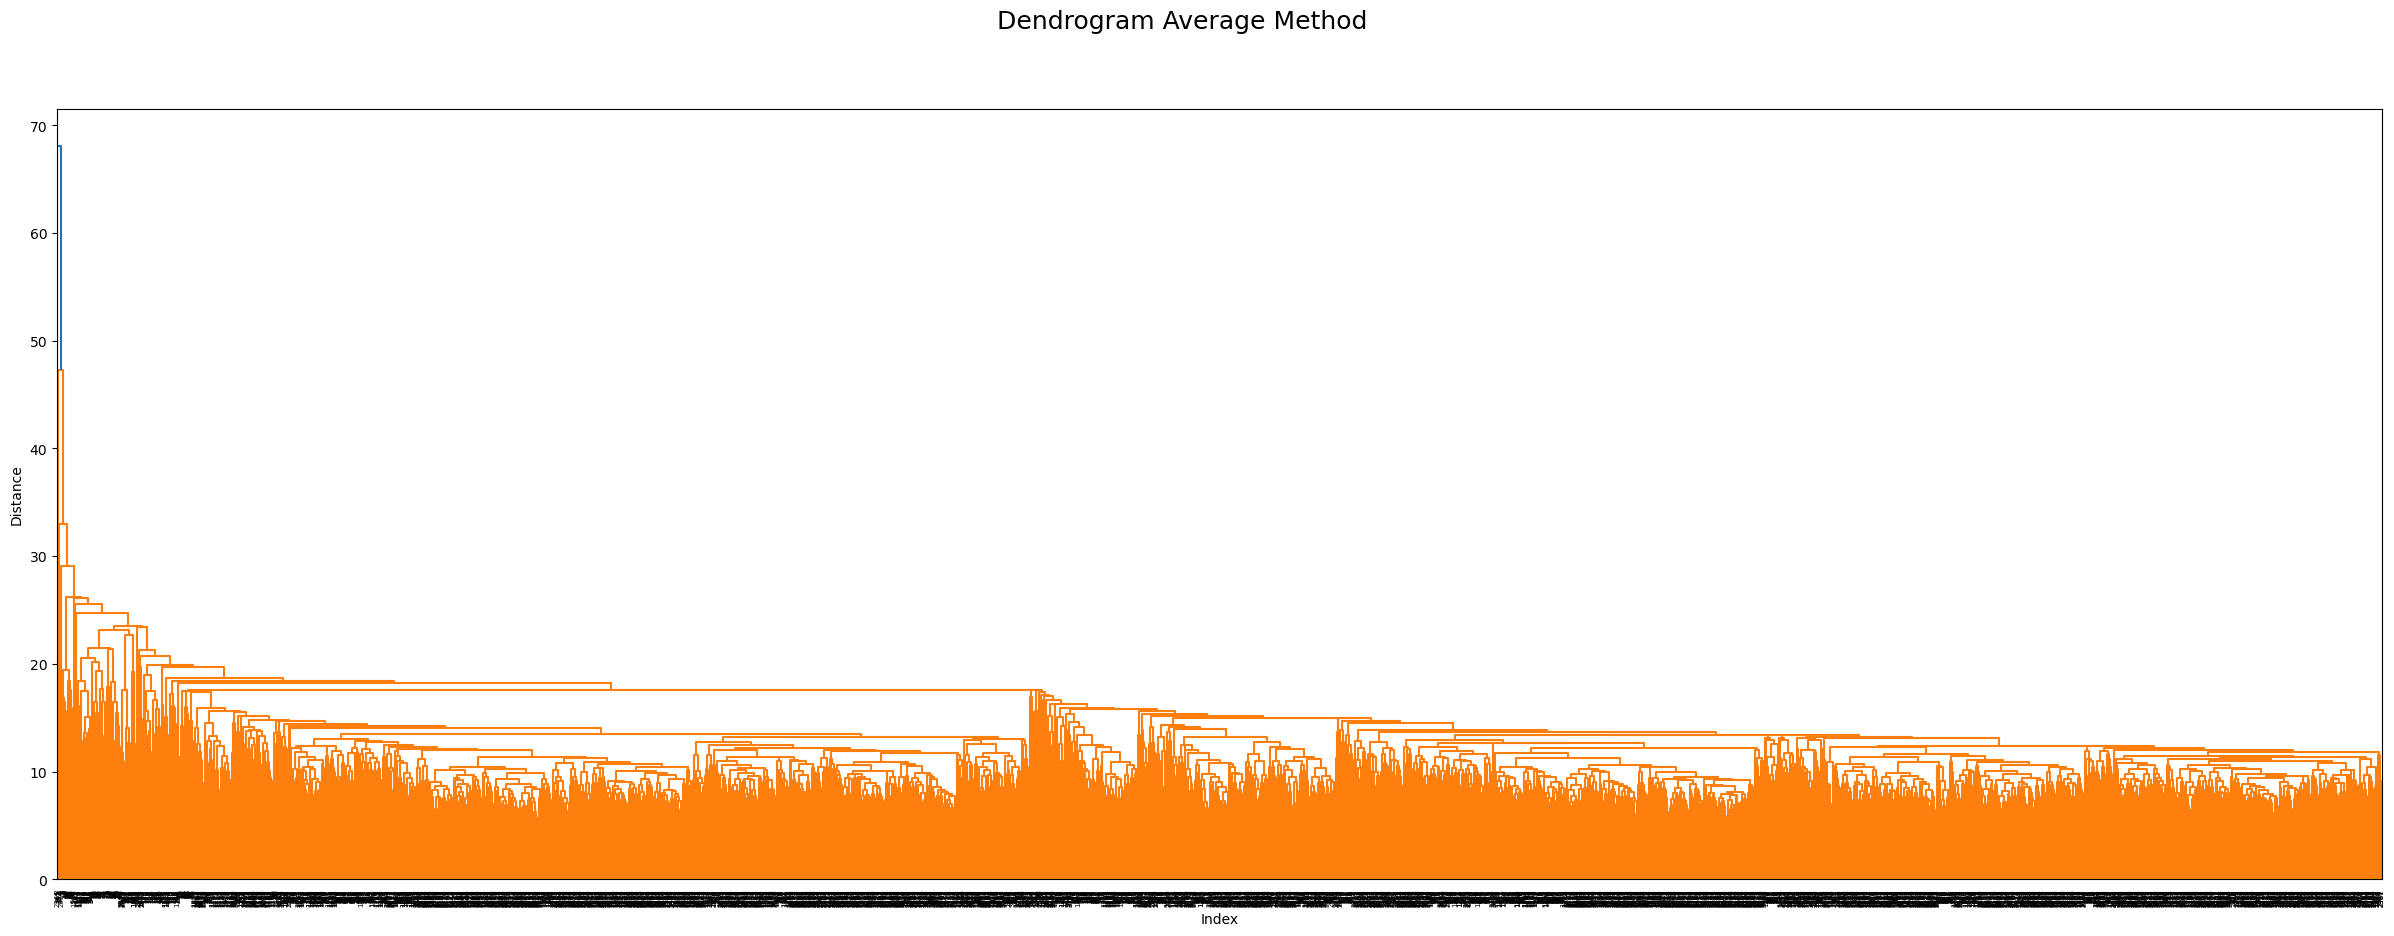

In [18]:
# Use the list to select the columns

distance_single = linkage(final_scaled[columns_to_plot], method="average")

# Plot the dendrogram

plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

Here as well there is probably too much data and the dendrogram is difficult to interpret.

# Complete method

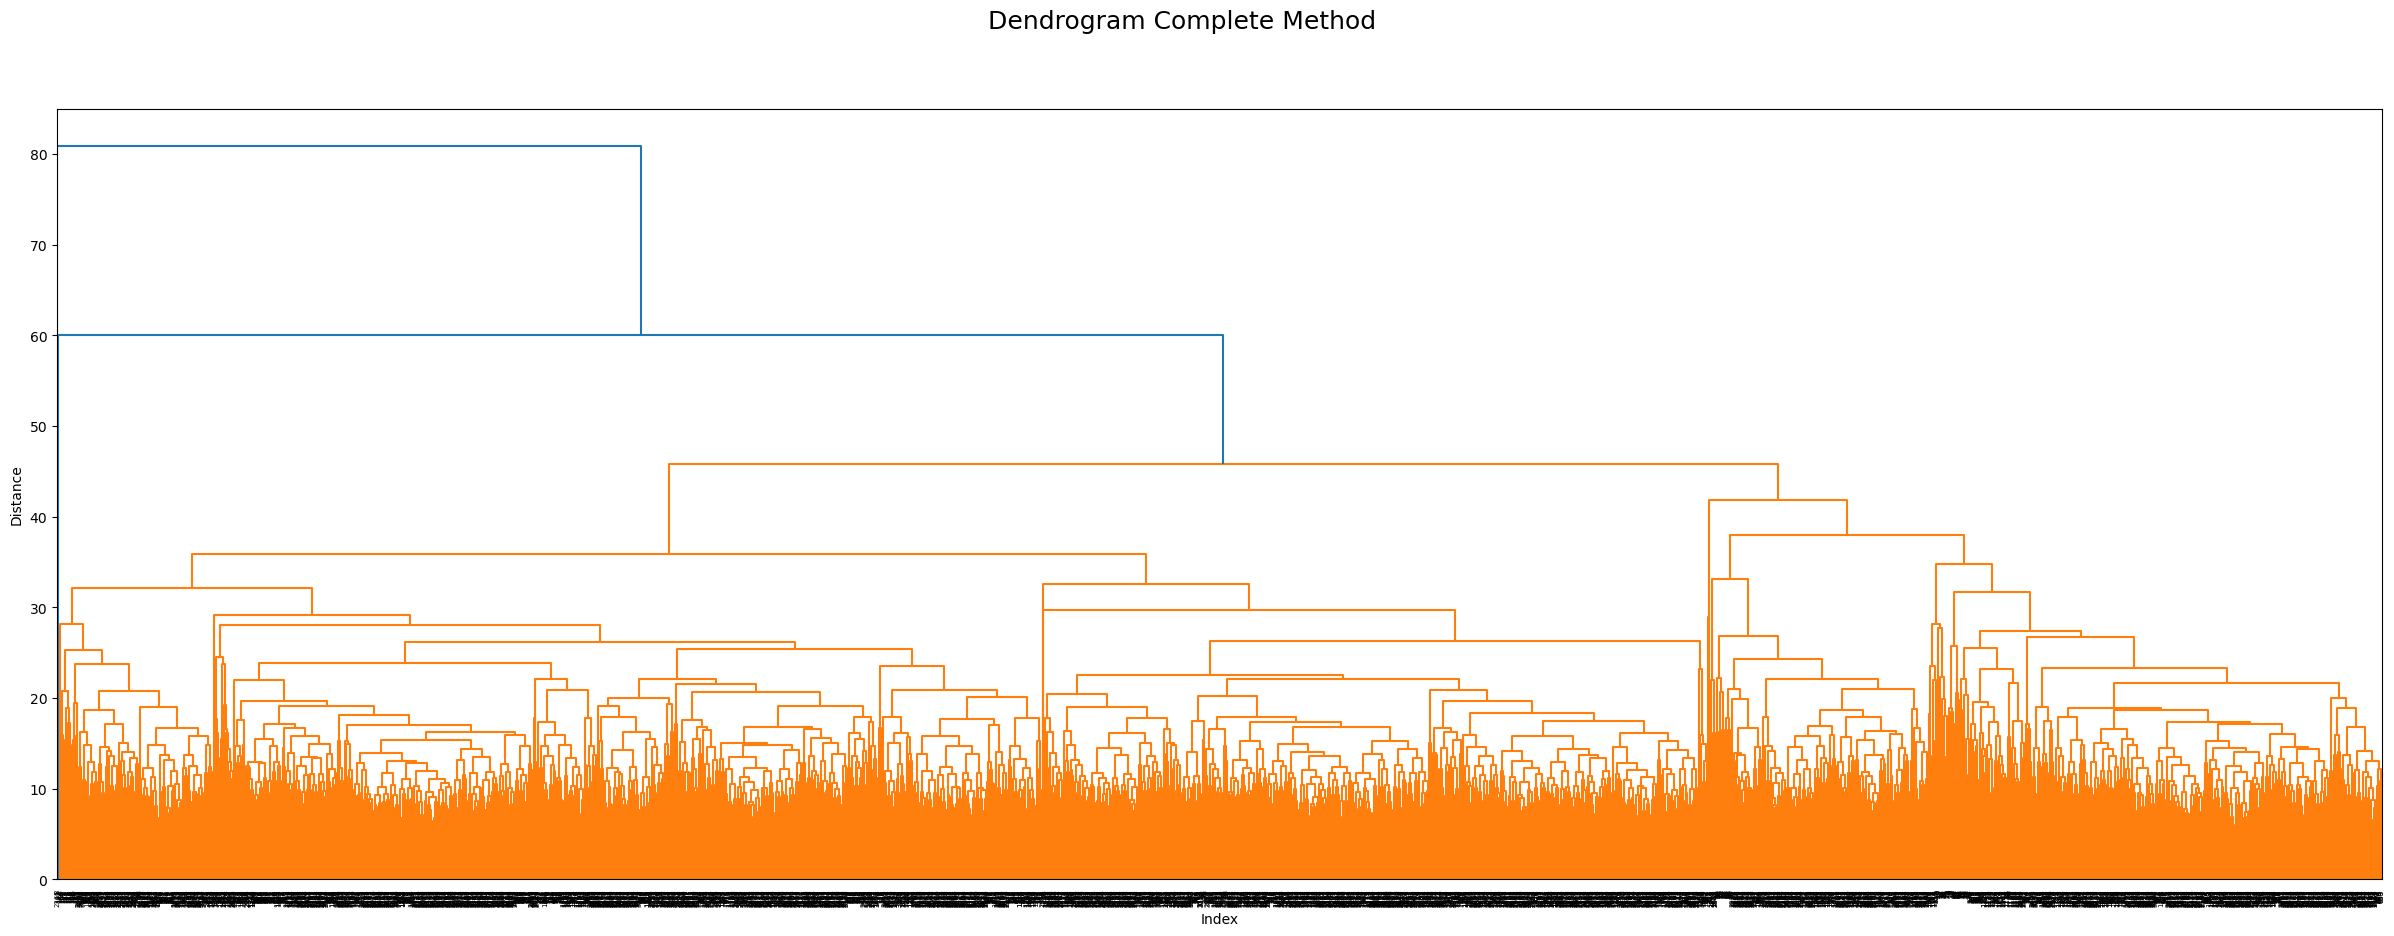

In [19]:
# Use the list to select the columns

distance_single = linkage(final_scaled[columns_to_plot], method="complete")

# Plot the dendrogram

plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

Same issue as above.

# Ward method

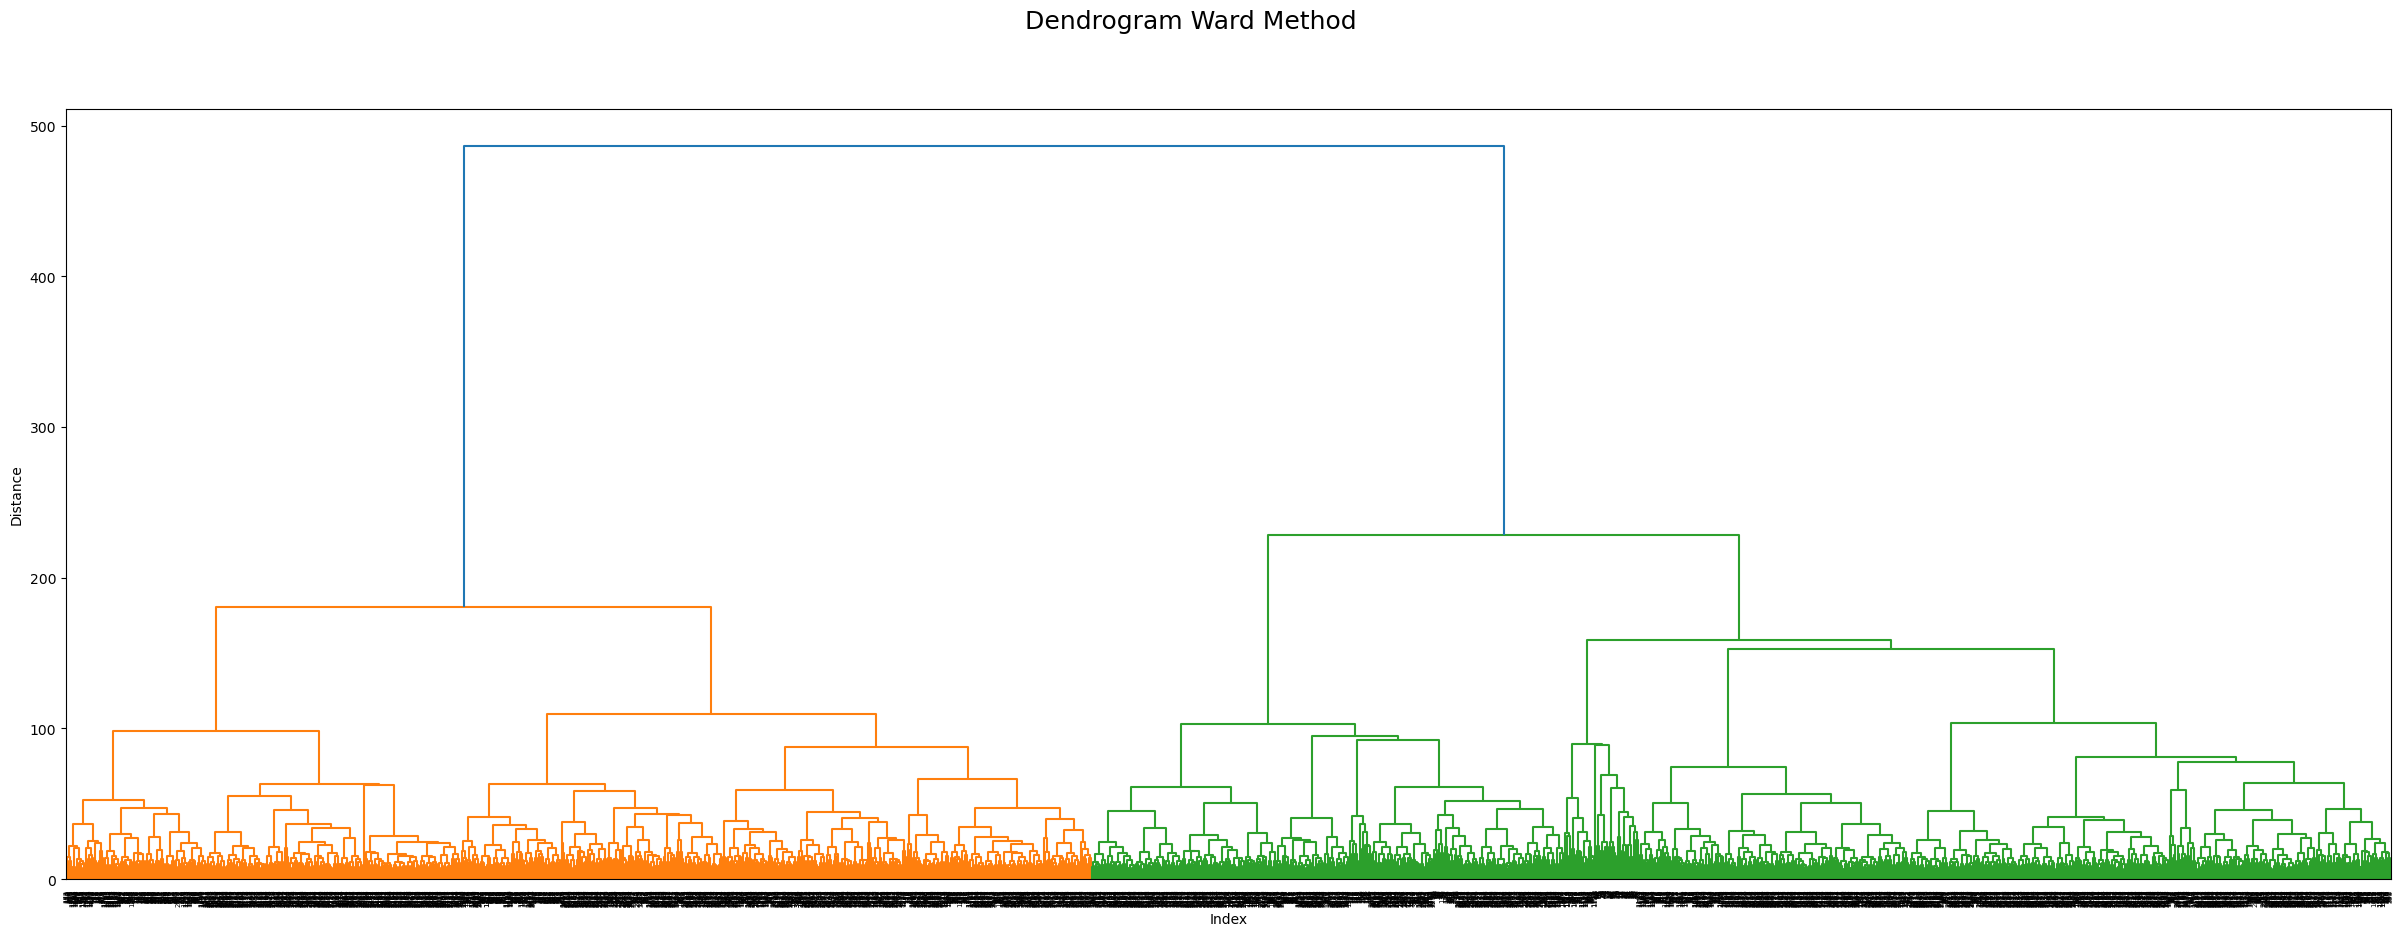

In [20]:
# Use the list to select the columns

distance_single = linkage(final_scaled[columns_to_plot], method="ward")

# Plot the dendrogram

plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

This is the only readable dendrogram so far, though it is difficult to say how many clusters were created.

# We should drastically reduce the size of our data set if we want to have more understandable results. Let's try to reduce it to a single year.

# Data Wrangling and Scaling - 2nd attempt

In [21]:
# Reduce the dataset to a single year (2015)

dfyear = weather[(weather['DATE'].astype(str).str[:4] == '2015')]
dfyear

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
20089,20150101,1,3,1.6,0.75,1.0382,0.74,0.00,7,1.0,-3.0,-7.1,1.1,2,0.75,1.0386,0.89,0.00,7.3,-8.0,-12.7,-6.0,4,0.67,1.017,1.41,0.00,5.4,-3.0,-6.6,-1.0,4,5.4,0.79,1.0302,0.25,0.00,2.8,3.0,1.0,4.7,5,4.4,0.87,1.0340,0.45,0.28,0,5.3,1.7,-2.3,5.5,8,0.89,1.0276,0.13,0.10,0,0.0,7.1,1.3,9.2,2.4,0.77,1.0161,1.14,0.19,4.0,9.1,5.4,13.1,6,1.0,0.75,1.0389,0.55,0.00,2.1,-5.8,-9.6,-3.0,2,5.7,0.81,1.0337,0.49,0.00,6.4,2.0,-1.5,5.1,0,0.8,0.66,1.0363,1.10,0.00,8.9,4.7,-1.0,10.4,4,0.88,0.64,0.00,23,5.9,-2.9,-5.8,2.4,8,1.9,0.97,1.0080,0.04,0.07,9,0.0,2.6,-2.4,4.1,6,10.2,0.99,1.0505,0.23,0.10,2.3,-9.5,-14.0,-5.0,5,1.0082,0.05,0.10,0.0,4.7,2.3,7.0,5,0.82,1.0142,0.03,0.41,0,3.4,10.7,7.9,13.5
20090,20150102,1,6,1.5,0.75,1.0377,0.62,0.14,6,5.2,-1.5,-4.0,1.0,6,0.72,1.0334,0.25,0.12,0.0,-1.7,-6.2,0.3,4,0.67,1.017,1.41,0.08,5.4,0.2,-2.1,2.1,5,6.1,0.72,1.0257,0.38,0.43,4.4,7.3,4.4,10.1,6,5.8,0.77,1.0274,0.29,0.11,0,2.2,5.6,1.7,8.8,3,0.71,1.0290,0.45,0.86,0,5.4,8.6,8.0,6.2,2.4,0.77,1.0161,1.14,0.19,4.0,9.1,5.4,13.1,7,0.8,0.83,1.0320,0.52,0.00,2.1,-0.6,-5.5,1.5,5,5.5,0.81,1.0289,0.18,0.69,1.0,5.1,2.3,8.3,3,0.6,0.62,1.0393,1.09,0.00,7.1,5.

In [22]:
# Create scaler object

scaler = StandardScaler()

In [23]:
# Scale dfyear

scaled_2015 = pd.DataFrame(scaler.fit_transform(dfyear), columns = list(dfyear))
scaled_2015

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.644406,-1.602745,-0.939746,-0.403933,0.258025,2.314107,-1.041032,-0.384141,12.905812,-0.953752,-2.010602,-2.227980,-1.810162,-0.691070,0.495860,2.430079,-0.738657,-0.377096,0.184125,-2.469919,-2.913297,-2.451305,0.0,0.0,4.440892e-16,0.0,-0.223585,1.776357e-15,-1.914246,-2.141858,-1.949888,-0.610788,1.203150,-0.057473,1.412516,-1.052419,-0.542053,-0.540339,-1.456678,-1.073960,-1.617425,-0.128571,0.160374,1.048184,1.836000,-0.817513,0.198698,-0.087571,0.140508,-1.578463,-1.631430,-1.395571,1.383818,1.311194,1.120919,-1.185492,-0.130567,0.0,-1.052930,-1.027328,-1.448539,-1.217863,4.440892e-16,1.110223e-16,0.0,-2.220446e-16,2.775558e-17,0.0,1.776357e-15,1.776357e-15,5.329071e-15,0.572306,-0.311277,-0.034259,2.348183,-0.892987,-0.351037,-0.775544,-2.194591,-2.390264,-2.145754,-1.346591,0.957102,0.335297,1.807302,-0.825311,-0.455328,0.300262,-1.502122,-1.573215,-1.405961,-1.289619,-1.067147,0.581840,2.342254,-0.942953,-0.266302,0.146023,-1.531860,-1.808162,-1.285541,-0.379797,1.276949,-0.817453,-0.421391,9.834251,0.100996,-1.801640,-1.851197,-1.483598,1.132120,-0.772321,1.443743,-0.234660,-1.088227,-0.321071,

In [24]:
# Create a copy of the DATE and MONTH columns

date_month_columns = dfyear[['DATE', 'MONTH']]
date_month_columns

,DATE,MONTH
20089,20150101,1
20090,20150102,1
20091,20150103,1
20092,20150104,1
20093,20150105,1
...,...,...
20449,20151227,12
20450,20151228,12
20451,20151229,12
20452,20151230,12


In [25]:
# Reset the index

date_month_columns.reset_index(drop=True, inplace=True)
date_month_columns

,DATE,MONTH
0,20150101,1
1,20150102,1
2,20150103,1
3,20150104,1
4,20150105,1
...,...,...
360,20151227,12
361,20151228,12
362,20151229,12
363,20151230,12


In [26]:
# Drop unnecessary scaled columns

scaled_2015.drop(['DATE', 'MONTH'], axis=1, inplace=True)

In [27]:
# Concatenate the DATE and MONTH columns back to the scaled dataframe

final_scaled_2015 = pd.concat([date_month_columns, scaled_2015], axis=1)
final_scaled_2015

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,20150101,1,-0.939746,-0.403933,0.258025,2.314107,-1.041032,-0.384141,12.905812,-0.953752,-2.010602,-2.227980,-1.810162,-0.691070,0.495860,2.430079,-0.738657,-0.377096,0.184125,-2.469919,-2.913297,-2.451305,0.0,0.0,4.440892e-16,0.0,-0.223585,1.776357e-15,-1.914246,-2.141858,-1.949888,-0.610788,1.203150,-0.057473,1.412516,-1.052419,-0.542053,-0.540339,-1.456678,-1.073960,-1.617425,-0.128571,0.160374,1.048184,1.836000,-0.817513,0.198698,-0.087571,0.140508,-1.578463,-1.631430,-1.395571,1.383818,1.311194,1.120919,-1.185492,-0.130567,0.0,-1.052930,-1.027328,-1.448539,-1.217863,4.440892e-16,1.110223e-16,0.0,-2.220446e-16,2.775558e-17,0.0,1.776357e-15,1.776357e-15,5.329071e-15,0.572306,-0.311277,-0.034259,2.348183,-0.892987,-0.351037,-0.775544,-2.194591,-2.390264,-2.145754,-1.346591,0.957102,0.335297,1.807302,-0.825311,-0.455328,0.300262,-1.502122,-1.573215,-1.405961,-1.289619,-1.067147,0.581840,2.342254,-0.942953,-0.266302,0.146023,-1.531860,-1.808162,-1.285541,-0.379797,1.276949,-0.817453,-0.421391,9.834251,0.100996,-1.801640,-1.851197,-1.483598,1.132120,-0.772321,1.443743,-0.234660,-1.088227,-0.321071,0.892746,

# Dendrograms - 2nd attempt

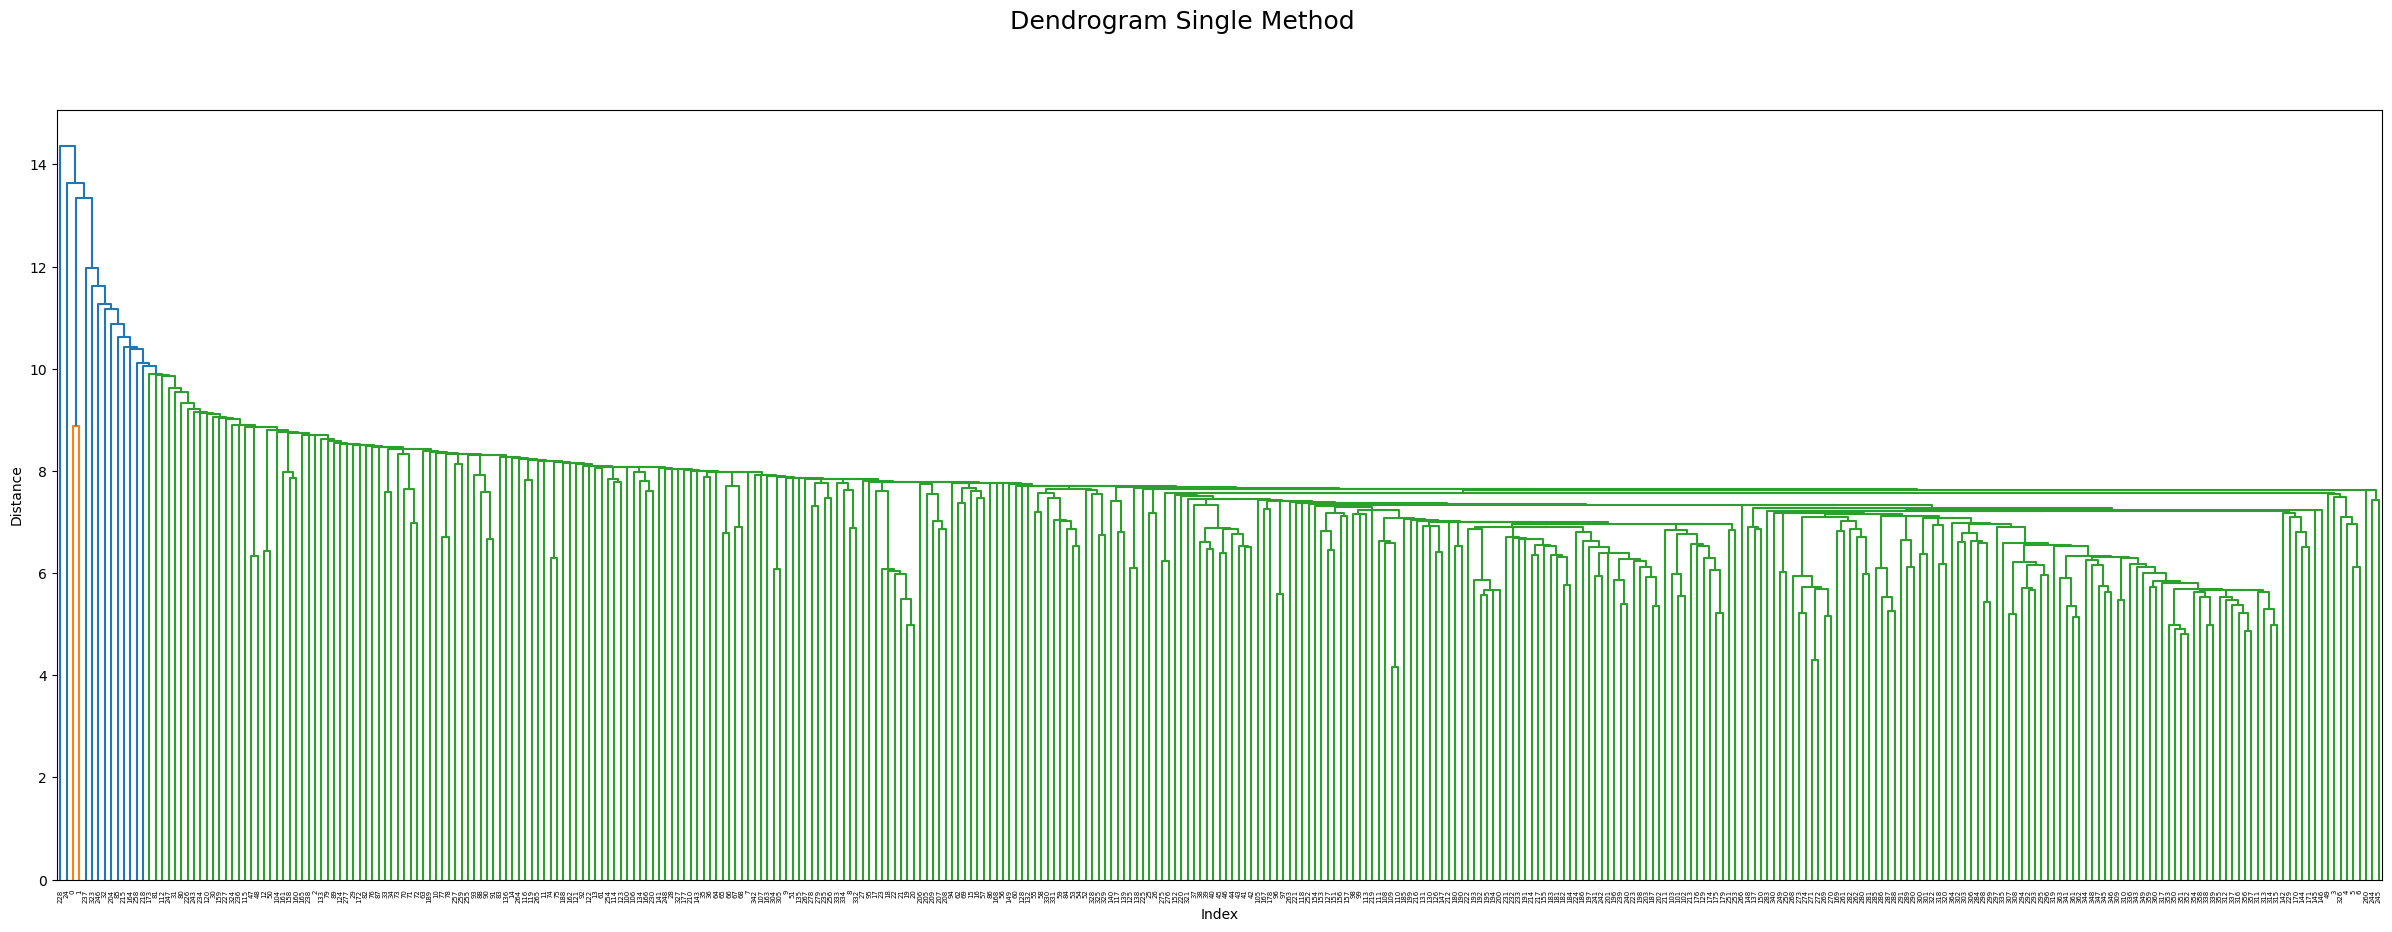

In [28]:
# Plot all stations 2015 - single method

distance_single = linkage(final_scaled_2015[columns_to_plot], method="single")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

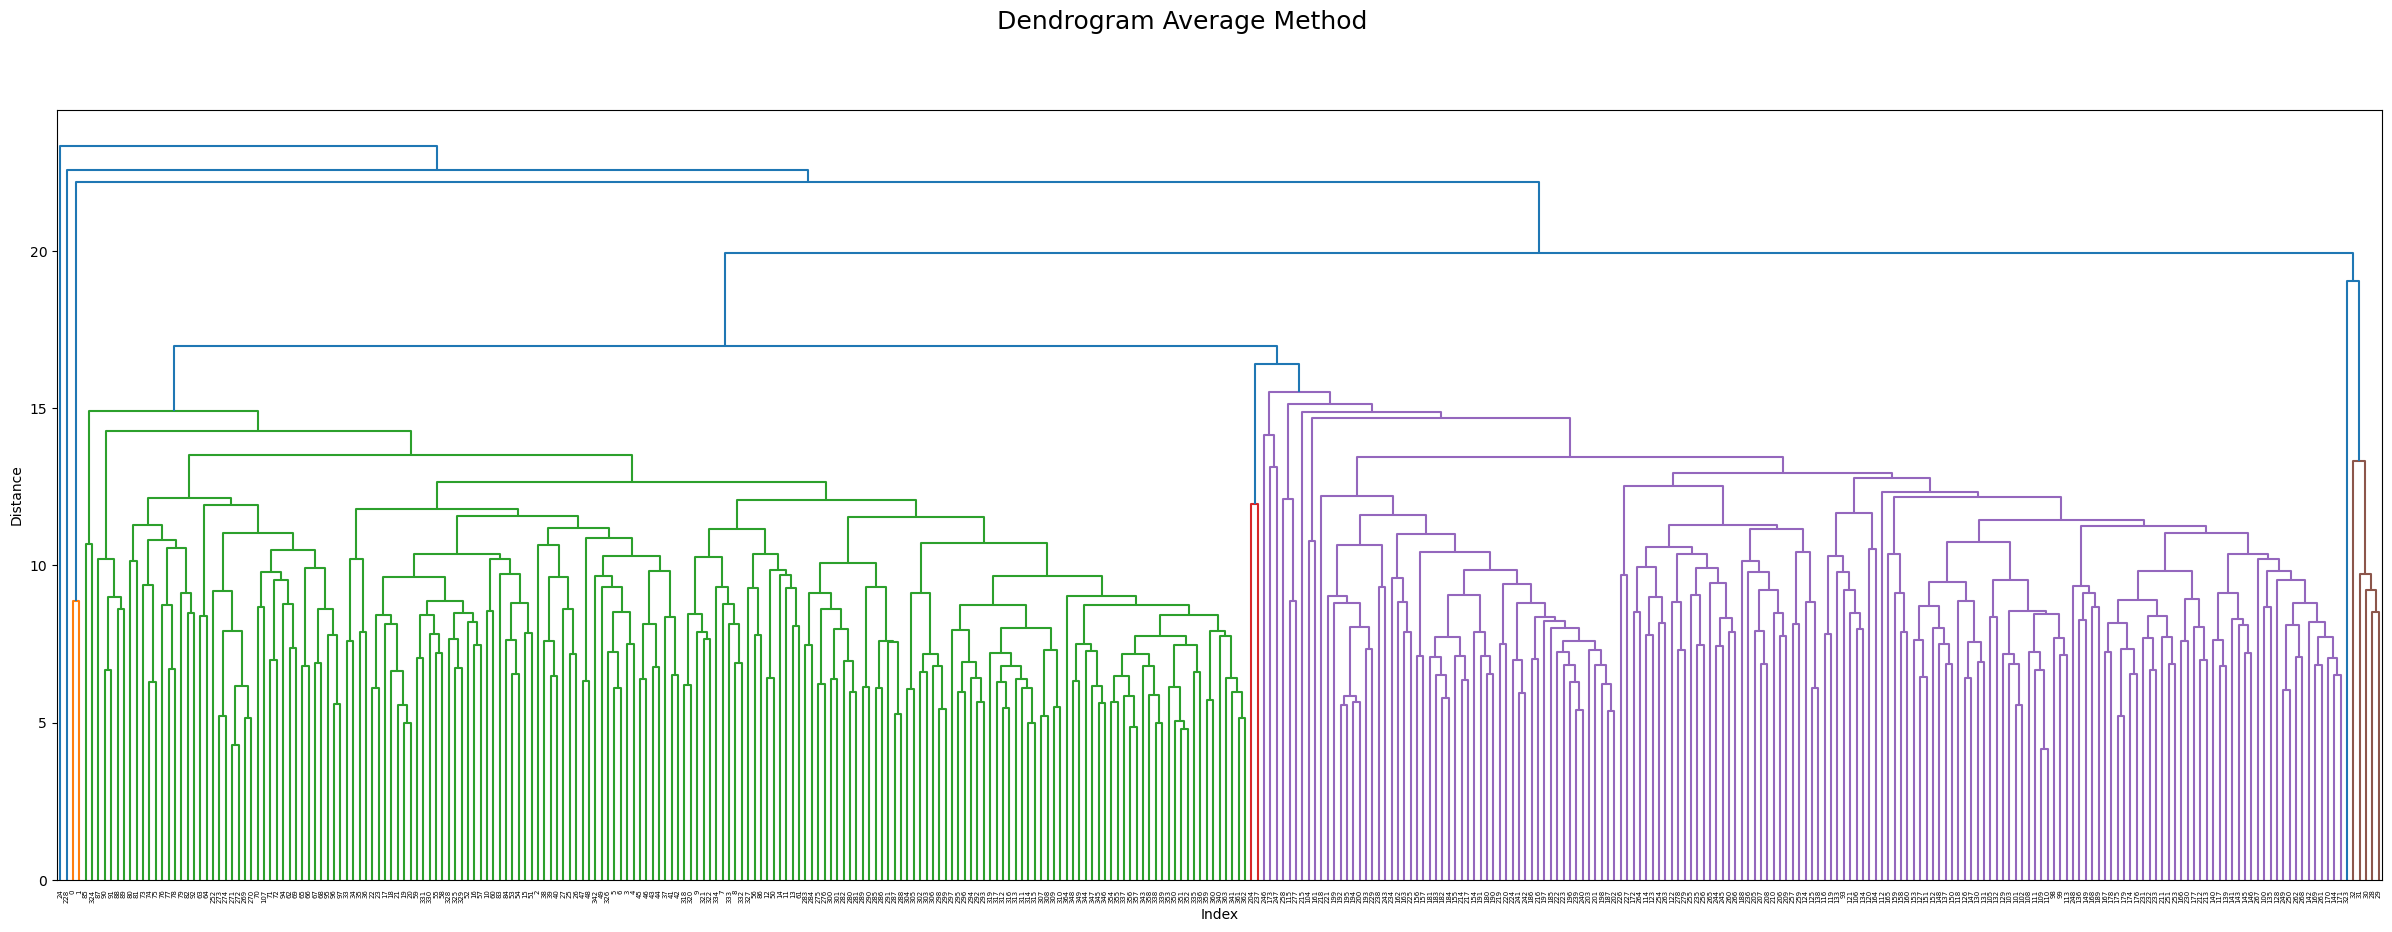

In [29]:
# Plot all stations 2015 - average method

distance_single = linkage(final_scaled_2015[columns_to_plot], method="average")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

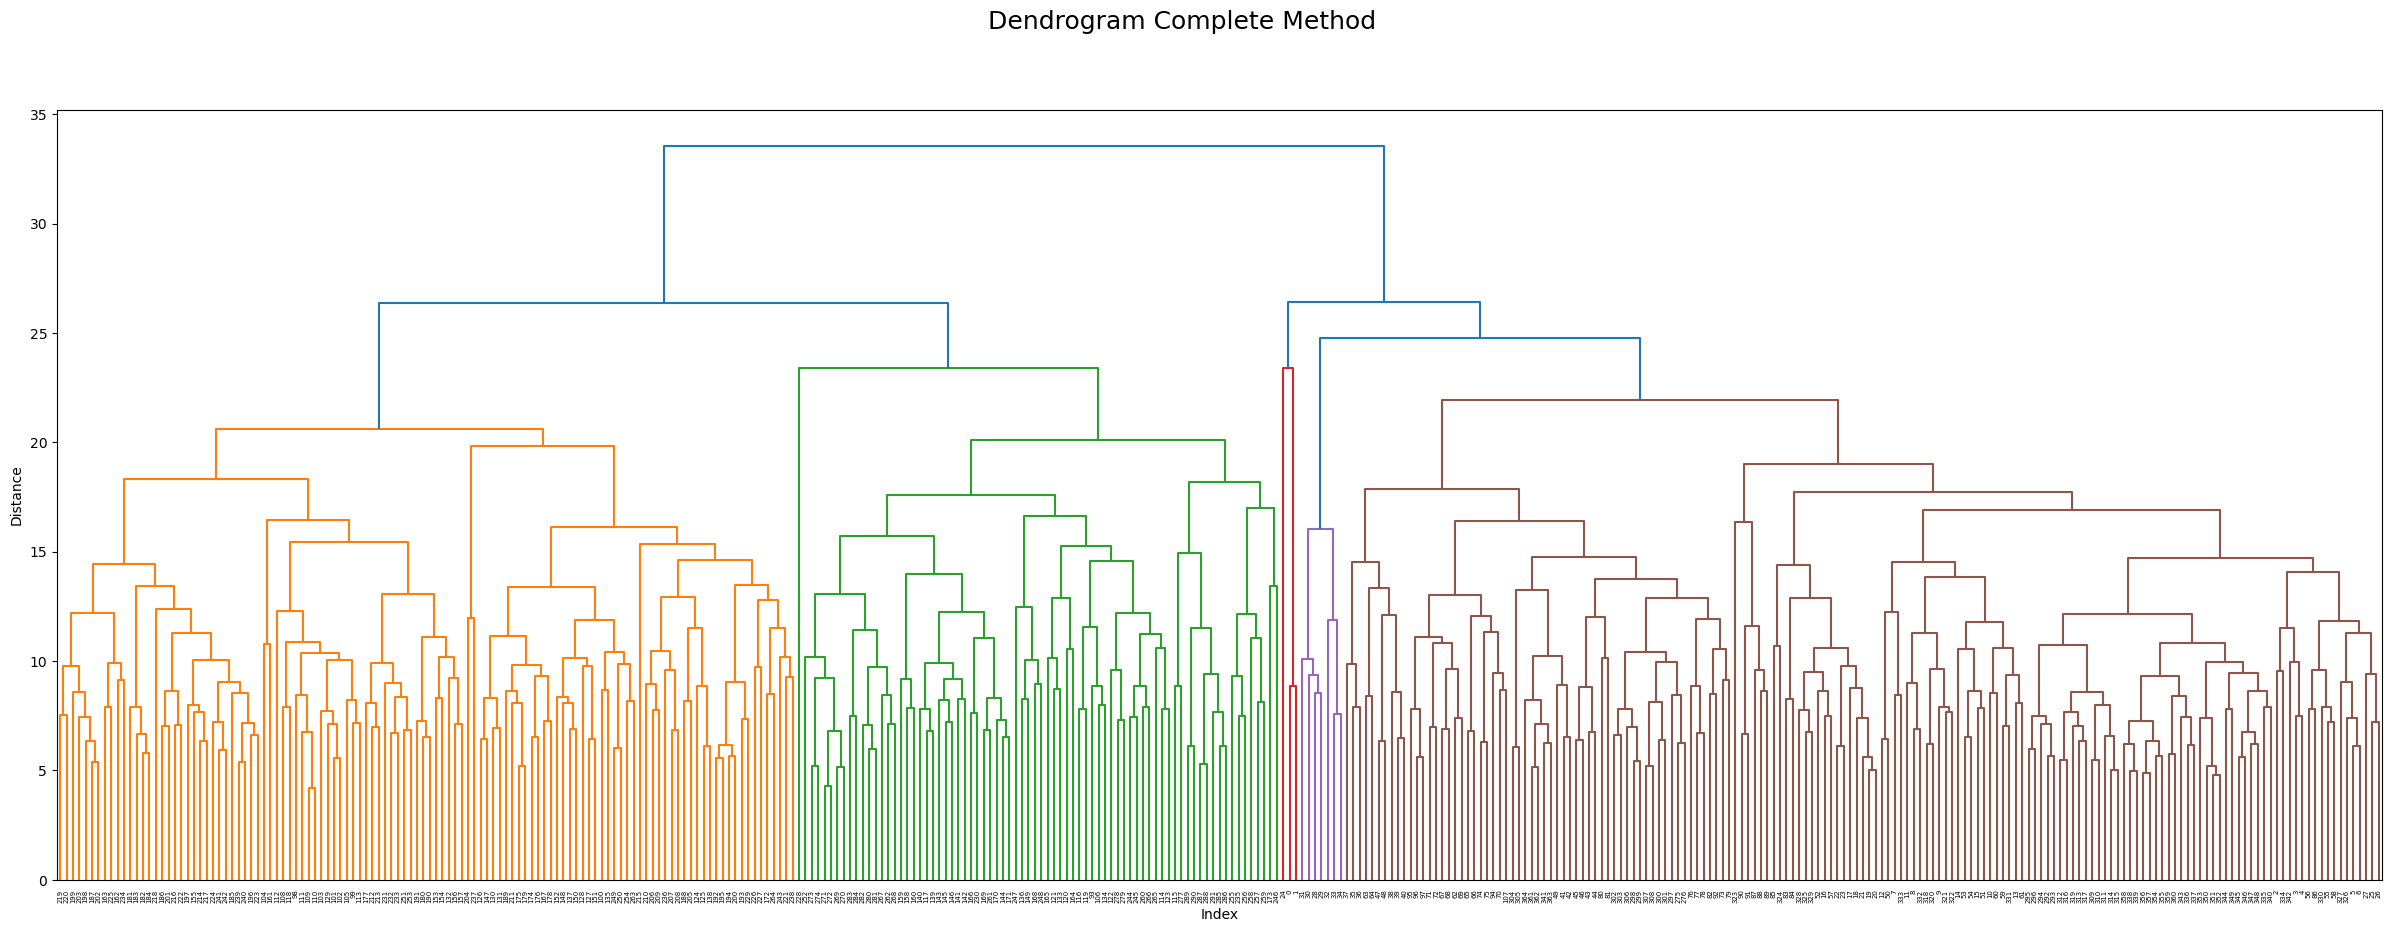

In [30]:
# Plot all stations 2015 - complete method

distance_single = linkage(final_scaled_2015[columns_to_plot], method="complete")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

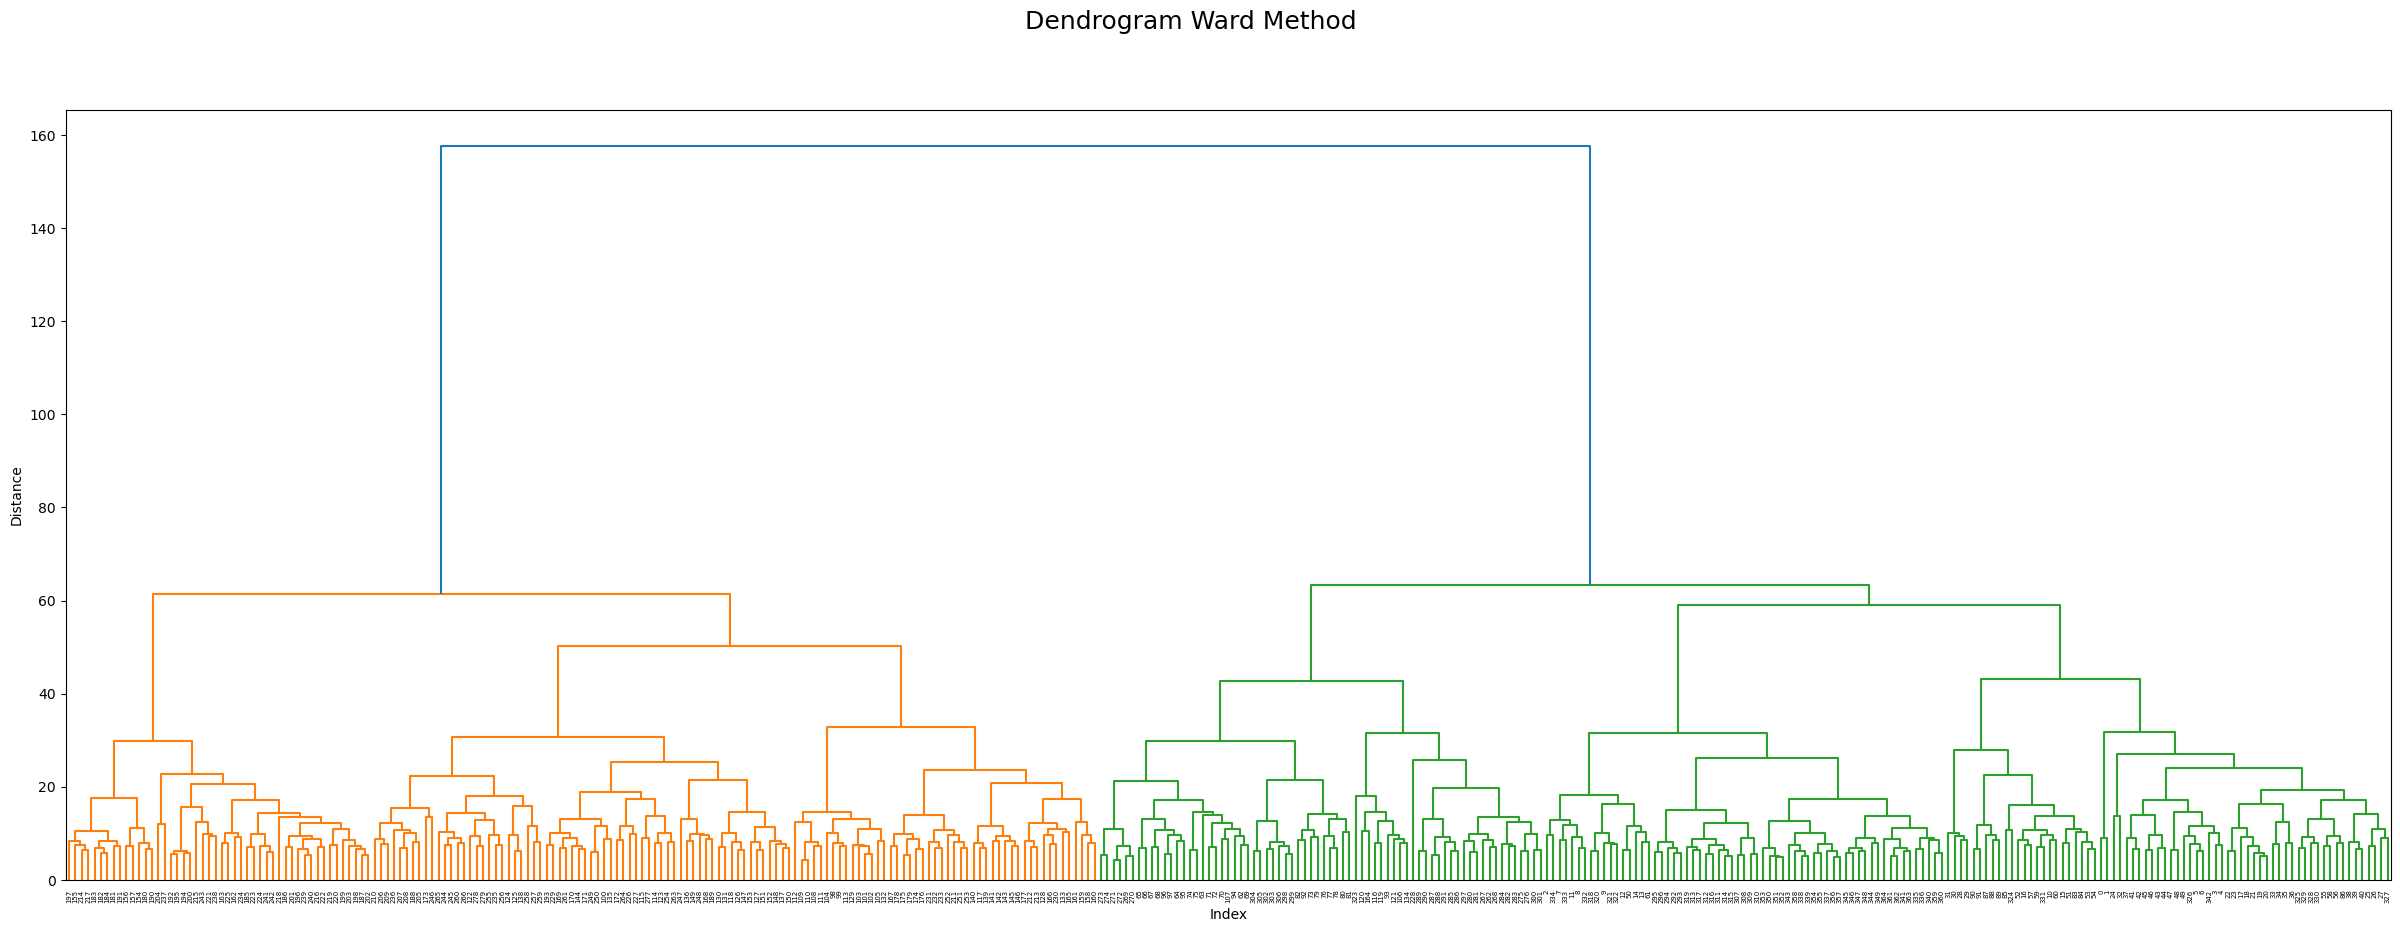

In [31]:
# Plot all stations 2015 - ward method

distance_single = linkage(final_scaled_2015[columns_to_plot], method="ward")
plt.figure(figsize=(30,10))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()

# Principal Component Analysis (PCA)

**Approach:** reducing the dimensions to match the number of recorded variables.

In [32]:
# Extract the variable names

recorded_variables = set(['_'.join(var.split('_')[1:]) for var in columns_to_plot])

In [33]:
# Convert the set to a sorted list to view the variables in order

recorded_variables = sorted(recorded_variables)
recorded_variables

['cloud_cover',
 'global_radiation',
 'humidity',
 'precipitation',
 'pressure',
 'snow_depth',
 'sunshine',
 'temp_max',
 'temp_mean',
 'temp_min',
 'wind_speed']

There are 11 recorded variables. Let's run the PCA model on the dfdecade scaled dataset (our final_scaled dataset) reducing the components to 11.

In [34]:
final_scaled

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,20100101,1,1.132837,0.505656,1.622829,-2.644573,-1.386157,0.672591,-0.185608,-1.089903,-1.128475,-1.102088,-1.263213,0.793622,1.301794,-3.439546,-1.171140,4.653648,-0.747593,-0.453788,-0.182702,-0.511221,2.246930,0.0,2.220446e-16,-1.961731,-0.314715,-1.787963,-0.906738,-0.698796,-0.999327,-0.783480,0.295116,-0.209427,-1.338700,-0.918870,-0.474490,-0.167200,-1.965574,-2.209539,-1.933669,1.314089,-0.027040,1.168313,-1.805303,-1.168605,-0.436243,-0.130923,-1.043323,-1.805708,-1.536767,-2.005211,-1.201609,0.121738,-0.931338,-0.767017,-0.453027,-0.083534,0.569700,-1.795894,-1.590768,-1.643214,0.956456,2.076278,-3.474642,-1.904815,0.077925,-1.564436,-2.467463,-1.968305,-2.660543,1.271401,-0.414737,1.603361,-3.320243,-1.283804,0.071872,-1.170469,-0.611718,-0.300603,-0.937624,0.584084,0.400369,1.128916,-1.681159,-1.223295,-0.414055,-1.173954,-1.917968,-2.148195,-2.045858,0.602616,2.696234,1.411740,-0.780560,-1.573157,-0.287753,-1.378922,-1.308362,-1.061242,-1.461833,0.674216,1.385644,-1.248996,0.294895,-0.404488,-1.101998,-0.941898,-0.917827,-1.096734,0.639973,2.791853,0.084472,-0.065380,-1.207685,0.000391,2.29003

In [35]:
# Select only the relevant columns

dfdecade_PCA = final_scaled[columns_to_plot]
dfdecade_PCA

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,1.132837,0.505656,1.622829,-2.644573,-1.386157,0.672591,-0.185608,-1.089903,-1.128475,-1.102088,-1.263213,0.793622,1.301794,-3.439546,-1.171140,4.653648,-0.747593,-0.453788,-0.182702,-0.511221,2.246930,0.0,2.220446e-16,-1.961731,-0.314715,-1.787963,-0.906738,-0.698796,-0.999327,-0.783480,0.295116,-0.209427,-1.338700,-0.918870,-0.474490,-0.167200,-1.965574,-2.209539,-1.933669,1.314089,-0.027040,1.168313,-1.805303,-1.168605,-0.436243,-0.130923,-1.043323,-1.805708,-1.536767,-2.005211,-1.201609,0.121738,-0.931338,-0.767017,-0.453027,-0.083534,0.569700,-1.795894,-1.590768,-1.643214,0.956456,2.076278,-3.474642,-1.904815,0.077925,-1.564436,-2.467463,-1.968305,-2.660543,1.271401,-0.414737,1.603361,-3.320243,-1.283804,0.071872,-1.170469,-0.611718,-0.300603,-0.937624,0.584084,0.400369,1.128916,-1.681159,-1.223295,-0.414055,-1.173954,-1.917968,-2.148195,-2.045858,0.602616,2.696234,1.411740,-0.780560,-1.573157,-0.287753,-1.378922,-1.308362,-1.061242,-1.461833,0.674216,1.385644,-1.248996,0.294895,-0.404488,-1.101998,-0.941898,-0.917827,-1.096734,0.639973,2.791853,0.084472,-0.065380,-1.207685,0.000391,2.290034,-1.134607,-1.817358,

In [36]:
# Run the PCA model

pca = PCA(n_components=11)
principalComponents = pca.fit_transform(dfdecade_PCA)

In [37]:
principalComponents

array([[-1.22174502e+01, -4.59386429e+00,  8.72095767e+00, ...,
         6.47308817e+00,  2.87514183e+00, -3.65814891e+00],
       [-1.43512139e+01,  5.60430460e-01,  6.53417376e+00, ...,
         8.73901964e+00,  3.60290866e+00, -1.80125856e+00],
       [-1.46120687e+01,  4.35855767e+00,  3.06948229e+00, ...,
         4.65839876e+00,  1.96467466e+00, -1.22530346e+00],
       ...,
       [-8.12198627e+00,  6.54770344e+00, -5.74941988e+00, ...,
        -1.42346456e-02,  9.56177129e-01, -1.71840644e-01],
       [-5.84343279e+00,  7.84396453e+00, -3.69886019e+00, ...,
         3.51834832e-01, -1.13116659e+00, -1.34749766e-01],
       [-7.38292064e+00,  4.35545129e+00, -4.29052061e+00, ...,
         3.90004252e-01, -6.70314815e-01,  8.33682156e-02]])

In [38]:
# Create a dataframe of the new components

dfPCA_decade = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11'])

Let's run the PCA on the final_scaled_2015 dataset 

In [39]:
final_scaled_2015

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,20150101,1,-0.939746,-0.403933,0.258025,2.314107,-1.041032,-0.384141,12.905812,-0.953752,-2.010602,-2.227980,-1.810162,-0.691070,0.495860,2.430079,-0.738657,-0.377096,0.184125,-2.469919,-2.913297,-2.451305,0.0,0.0,4.440892e-16,0.0,-0.223585,1.776357e-15,-1.914246,-2.141858,-1.949888,-0.610788,1.203150,-0.057473,1.412516,-1.052419,-0.542053,-0.540339,-1.456678,-1.073960,-1.617425,-0.128571,0.160374,1.048184,1.836000,-0.817513,0.198698,-0.087571,0.140508,-1.578463,-1.631430,-1.395571,1.383818,1.311194,1.120919,-1.185492,-0.130567,0.0,-1.052930,-1.027328,-1.448539,-1.217863,4.440892e-16,1.110223e-16,0.0,-2.220446e-16,2.775558e-17,0.0,1.776357e-15,1.776357e-15,5.329071e-15,0.572306,-0.311277,-0.034259,2.348183,-0.892987,-0.351037,-0.775544,-2.194591,-2.390264,-2.145754,-1.346591,0.957102,0.335297,1.807302,-0.825311,-0.455328,0.300262,-1.502122,-1.573215,-1.405961,-1.289619,-1.067147,0.581840,2.342254,-0.942953,-0.266302,0.146023,-1.531860,-1.808162,-1.285541,-0.379797,1.276949,-0.817453,-0.421391,9.834251,0.100996,-1.801640,-1.851197,-1.483598,1.132120,-0.772321,1.443743,-0.234660,-1.088227,-0.321071,0.892746,

In [40]:
# Select only the relevant columns

df2015_PCA = final_scaled_2015[columns_to_plot]
df2015_PCA

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,BELGRADE_humidity,BELGRADE_pressure,BELGRADE_global_radiation,BELGRADE_precipitation,BELGRADE_sunshine,BELGRADE_temp_mean,BELGRADE_temp_min,BELGRADE_temp_max,BUDAPEST_cloud_cover,BUDAPEST_humidity,BUDAPEST_pressure,BUDAPEST_global_radiation,BUDAPEST_precipitation,BUDAPEST_sunshine,BUDAPEST_temp_mean,BUDAPEST_temp_min,BUDAPEST_temp_max,DEBILT_cloud_cover,DEBILT_wind_speed,DEBILT_humidity,DEBILT_pressure,DEBILT_global_radiation,DEBILT_precipitation,DEBILT_sunshine,DEBILT_temp_mean,DEBILT_temp_min,DEBILT_temp_max,DUSSELDORF_cloud_cover,DUSSELDORF_wind_speed,DUSSELDORF_humidity,DUSSELDORF_pressure,DUSSELDORF_global_radiation,DUSSELDORF_precipitation,DUSSELDORF_snow_depth,DUSSELDORF_sunshine,DUSSELDORF_temp_mean,DUSSELDORF_temp_min,DUSSELDORF_temp_max,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_snow_depth,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max,KASSEL_wind_speed,KASSEL_humidity,KASSEL_pressure,KASSEL_global_radiation,KASSEL_precipitation,KASSEL_sunshine,KASSEL_temp_mean,KASSEL_temp_min,KASSEL_temp_max,LJUBLJANA_cloud_cover,LJUBLJANA_wind_speed,LJUBLJANA_humidity,LJUBLJANA_pressure,LJUBLJANA_global_radiation,LJUBLJANA_precipitation,LJUBLJANA_sunshine,LJUBLJANA_temp_mean,LJUBLJANA_temp_min,LJUBLJANA_temp_max,MAASTRICHT_cloud_cover,MAASTRICHT_wind_speed,MAASTRICHT_humidity,MAASTRICHT_pressure,MAASTRICHT_global_radiation,MAASTRICHT_precipitation,MAASTRICHT_sunshine,MAASTRICHT_temp_mean,MAASTRICHT_temp_min,MAASTRICHT_temp_max,MADRID_cloud_cover,MADRID_wind_speed,MADRID_humidity,MADRID_pressure,MADRID_global_radiation,MADRID_precipitation,MADRID_sunshine,MADRID_temp_mean,MADRID_temp_min,MADRID_temp_max,MUNCHENB_cloud_cover,MUNCHENB_humidity,MUNCHENB_global_radiation,MUNCHENB_precipitation,MUNCHENB_snow_depth,MUNCHENB_sunshine,MUNCHENB_temp_mean,MUNCHENB_temp_min,MUNCHENB_temp_max,OSLO_cloud_cover,OSLO_wind_speed,OSLO_humidity,OSLO_pressure,OSLO_global_radiation,OSLO_precipitation,OSLO_snow_depth,OSLO_sunshine,OSLO_temp_mean,OSLO_temp_min,OSLO_temp_max,SONNBLICK_cloud_cover,SONNBLICK_wind_speed,SONNBLICK_humidity,SONNBLICK_pressure,SONNBLICK_global_radiation,SONNBLICK_precipitation,SONNBLICK_sunshine,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,STOCKHOLM_cloud_cover,STOCKHOLM_pressure,STOCKHOLM_global_radiation,STOCKHOLM_precipitation,STOCKHOLM_sunshine,STOCKHOLM_temp_mean,STOCKHOLM_temp_min,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-0.939746,-0.403933,0.258025,2.314107,-1.041032,-0.384141,12.905812,-0.953752,-2.010602,-2.227980,-1.810162,-0.691070,0.495860,2.430079,-0.738657,-0.377096,0.184125,-2.469919,-2.913297,-2.451305,0.0,0.0,4.440892e-16,0.0,-0.223585,1.776357e-15,-1.914246,-2.141858,-1.949888,-0.610788,1.203150,-0.057473,1.412516,-1.052419,-0.542053,-0.540339,-1.456678,-1.073960,-1.617425,-0.128571,0.160374,1.048184,1.836000,-0.817513,0.198698,-0.087571,0.140508,-1.578463,-1.631430,-1.395571,1.383818,1.311194,1.120919,-1.185492,-0.130567,0.0,-1.052930,-1.027328,-1.448539,-1.217863,4.440892e-16,1.110223e-16,0.0,-2.220446e-16,2.775558e-17,0.0,1.776357e-15,1.776357e-15,5.329071e-15,0.572306,-0.311277,-0.034259,2.348183,-0.892987,-0.351037,-0.775544,-2.194591,-2.390264,-2.145754,-1.346591,0.957102,0.335297,1.807302,-0.825311,-0.455328,0.300262,-1.502122,-1.573215,-1.405961,-1.289619,-1.067147,0.581840,2.342254,-0.942953,-0.266302,0.146023,-1.531860,-1.808162,-1.285541,-0.379797,1.276949,-0.817453,-0.421391,9.834251,0.100996,-1.801640,-1.851197,-1.483598,1.132120,-0.772321,1.443743,-0.234660,-1.088227,-0.321071,0.892746,-1.043450,-0.799986,-1

In [41]:
# Run the PCA model

pca = PCA(n_components=11)
principalComponents1 = pca.fit_transform(df2015_PCA)

In [42]:
# Create a dataframe of the new components

dfPCA_2015 = pd.DataFrame(principalComponents1, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11'])

In [43]:
dfPCA_2015

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-11.439892,-4.621283,-2.045900,-0.460808,2.983303,-0.255122,-2.634675,0.798546,12.119320,5.744144,3.805449
1,-9.012438,-2.083631,-1.505733,-0.585807,4.505237,-0.957513,-0.805907,-0.480723,9.725530,4.565579,5.300935
2,-9.546393,0.965579,-0.550836,1.817913,2.352192,0.659593,3.527003,0.053483,3.831541,0.985720,1.230778
3,-8.268576,-4.398630,0.802458,2.360437,1.398000,0.753972,2.000445,0.081692,1.074776,0.214738,-1.364220
4,-9.711707,-4.015296,-0.656628,1.589404,1.399819,1.740408,-0.057080,0.812609,-0.005342,-0.497240,-2.997719
...,...,...,...,...,...,...,...,...,...,...,...
360,-5.978946,-1.684967,-6.475303,-1.331058,-0.330353,-1.223390,0.788895,0.459120,0.233881,-0.123289,-1.531144
361,-6.281865,-4.178433,-4.231964,-0.372358,-1.917963,-2.130730,-0.298750,-0.060358,-0.884976,0.073756,0.144202
362,-7.960926,-3.021123,-4.266017,1.262107,-1.298077,-2.163668,-0.636455,-0.641626,-1.071654,-1.321714,0.367501
363,-8.303937,-2.054489,-4.531086,0.030866,-1.489933,-3.351810,0.003916,0.005768,-1.138275,-0.768725,-0.201925


# Export to CSV

In [44]:
dfPCA_decade.to_csv(os.path.join(path, 'Prepared/2010-2019_PCA.csv'), index=False)

In [45]:
dfPCA_2015.to_csv(os.path.join(path, 'Prepared/2015_PCA.csv'), index=False)